# 1. Introduction to Deep Learning

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

In [ ]:
if torch.cuda.is_available():
  DEVICE = torch.device('cuda')
else:
  DEVICE = torch.device('cpu')

print('Using PyTorch version:', torch.__version__, ' Device:', DEVICE)

Using PyTorch version: 2.1.0+cu121  Device: cpu


In [ ]:
BATCH_SIZE = 32
EPOCHS = 10

In [ ]:
train_dataset = datasets.MNIST(root = "../data/MNITST", train = True, download = True, transform = transforms.ToTensor())
test_dataset = datasets.MNIST(root = "../data/MNIST", train = False, download = True, transform = transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = BATCH_SIZE, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = BATCH_SIZE, shuffle = False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**(1) Using torvision.transforms**

In [ ]:
transform_train = transforms.Compose([transforms.Resize(size=(256, 256)), transforms.RandomRotation(30), transforms.ToTensor()])
transform_val = transforms.Compose([transforms.Resize(size=(256, 256)), transforms.ToTensor()])

train_data = datasets.ImageFolder(root='/content/drive/Mydrive/codingstudy/assignment3/afhp/train', transform=transform_train)
val_data = datasets.ImageFolder(root='/content/drive/Mydrive/codingstudy/assignment3/afhp/val',transform=transform_val)

train_loader = torch.utils.data.DataLoader(train_data, bath_size = 16, shuffle = True)
val_loader - torch.utils.data.Data>loader(val_data, batch_size = 16, shuffle = True)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/Mydrive/codingstudy/assignment3/afhp/train'

In [ ]:
train_data.class_to_idx

In [ ]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

In [ ]:
def show_imgs(imgs, labels, preds=None):
  f, axes = plt.subplots(1,8,figsize=(30,5))
  for i, axis in enumerate(axes):
    axes[i].imshow(np.squeeze(np.transpose(imgs[i].numpy(), (1, 2, 0))), cmap='gray')
    axes[i].set_title(f'Label: {labels[i].numpy()}')
    if preds != None:
      axes[i].set_xlabel(f'Pred: {np.argmax(preds[i].numpy())}')
  plt.show()

show_imgs(images, labels)

**(2) Making a customized datesets and dataloader**

In [ ]:
import os

In [ ]:
train_cat = os.listdir('/content/drive/Mydrive/codingstudy/assignment3/afhp/train/cat')
train_dog = os.listdir('/content/drive/Mydrive/codingstudy/assignment3/afhp/train/dog')
train_wild = os.listdir('/content/drive/Mydrive/codingstudy/assignment3/afhp/train/wild')

In [ ]:
train_cat_image = []
train_dog_image = []
train_wild_image = []

train_cat_target = []
train_dog_target = []
train_wild_target = []

for i in range(len(train_cat)):
  image = plt.imread(os.path.join('/content/drive/Mydrive/codingstudy/assignment3/afhp/train/cat', train_cat[i]))
  train_cat_image.append(image)
  train_cat_target.append(0)

for i in range(len(train_dog)):
  image = plt.imread(os.path.join('/content/drive/Mydrive/codingstudy/assignment3/afhp/train/dog', train_dog[i]))
  train_cat_image.append(image)
  train_cat_target.append(1)

for i in range(len(train_wild)):
  image = plt.imread(os.path.join('/content/drive/Mydrive/codingstudy/assignment3/afhp/train/wild', train_wild[i]))
  train_cat_image.append(image)
  train_cat_target.append(2)

## **Q1. Explain os.path.join function**

두개의 인자를 받아서 둘을 주소의 형태로 합해주어서 하나의 주소를 반환해주는 함수입니다.
위에서는 그 주고를 받아서 이미지를 읽어오는 과정에서 사용되었습니다.

# 2. Backpropagation and PyTorch Autograd

In [ ]:
import torch

In [ ]:
w = torch.tensor(3.0, requires_grad = True)

In [ ]:
y = w**3 + 10

In [ ]:
y.backward()

In [ ]:
print(f'Differntiating y by w: {w.grad}')

In [ ]:
import torch
import torch.nn as nn

In [ ]:
x = torch.ones(5)
y = torch.zeros(3)

w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)

In [ ]:
z = torch.matmul(x,w) + b
loss_fn = nn.MSELoss()

In [ ]:
loss = loss_fn(z, y)

loss.backward()

In [ ]:
print(f'Differentiating loss by w :/n {w.grad}')
print(f'Differentiating loss by b : {b.grad}')

## **Q2. PyTorch Autograd and DataLoader**

Read the following document and summarize it.

AutoGrad란 PyTorch를 이용해서 코드를 작성할 때 역전파를 통해 파라미터를 업데이트하는 방법은 바로 AutoGrad이다.

연산 그래프와 autograd는 복잡한 연산자를 정의하고 도함수를 자동으로 계산하는 강력한 도구입니다. 하지만 대규모 신경망에서는 autograd 그 자체만으로는 너무 저수준일 수 있습니다.

### PyTorch는 신경망을 생성하고 학습시키는 것을 도와주기 위해서 torch.nn , torch.optim 이 제공된다.

**torch.nn : 다양한 뉴럴 네트워크를 생성할 수 있는 패키지입니다.**


*   torch.nn.Module : 함수처럼 동작하지만, 또한 상태를 포함할 수 있는 호출 가능한 오브젝트를 생성합니다. 이는 포함된 파라미터들이 어떤 것인지 알고, 모든 기울기를 0으로 설정하고 가중치 업데이트 등을 위해 반복할 수 있습니다.
*   torch.optim : 앞에서는 torch.no_grad()로 학습가능한 매개변수를 갖는 텐서들을 집적 조작하여 모델의 가중치를 갱신하였습니다. 이는 간단한 최적화 알고리즘에서는 크게 부담이 되지 않지만, 실제로 신경망을 학습할 때는 AdaGead, RMSProp, Adam 등과 같은 더 정교한 옵티마이저를 사용하곤 합니다. 이에 PyTorch의 optim패키지는 최적화 알고리즘에 대한 아이디어를 추상화하고 일반적으로 사용하는 최적화 알고리즘을 구현합니다.

### Dataset, DataLoader 데이터 샘플을 처리하는 코드는 지저분하고 유지보수가 어려울 수 있습니다. 더 나은 가독성과 모듈성을 위해 데이터셋 코드를 모델 학습 코드로부터 분리하는 것이 이상적입니다.

**PyTorch는 torch.utils.data.DataLoader와 torch.utils.data.Dataset 이 두 가지 데이터 기본 요소를 제공하여 미리 준비된 데이터셋 뿐만 아니라 가지고 있는 데이터를 사용할 수 있도고 합니다.**

*   torch.utils.data.Dataset : 샘플과 라벨을 저장하고, len 및 getitem 이 있는 객체의 추상 인터페이스
*   torch.utils.data.Dataloader : 모든 종류의 Dataset을 기반으로 데이터의 배치들을 출력하는 iterator를 생성합니다.



# 3. Vanishing Gradient Problem

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import warnings
from matplotlib.colors import ListedColormap
from mlxtend.plotting import plot_decision_regions
from pylab import rcParams
from sklearn.datasets import make_circles, make_moons
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [ ]:
np.set_printoptions(suppress=True)
zero_one_colourmap = ListedColormap(('white','red'))
rcParams['figure.figsize'] = 14, 7
rcParams['axes.facecolor'] = '#383838'

In [ ]:
X, y = make_circles(n_samples = 1000,
                    factor = 0.85,
                    random_state=2021,
                    noise = 0.1)

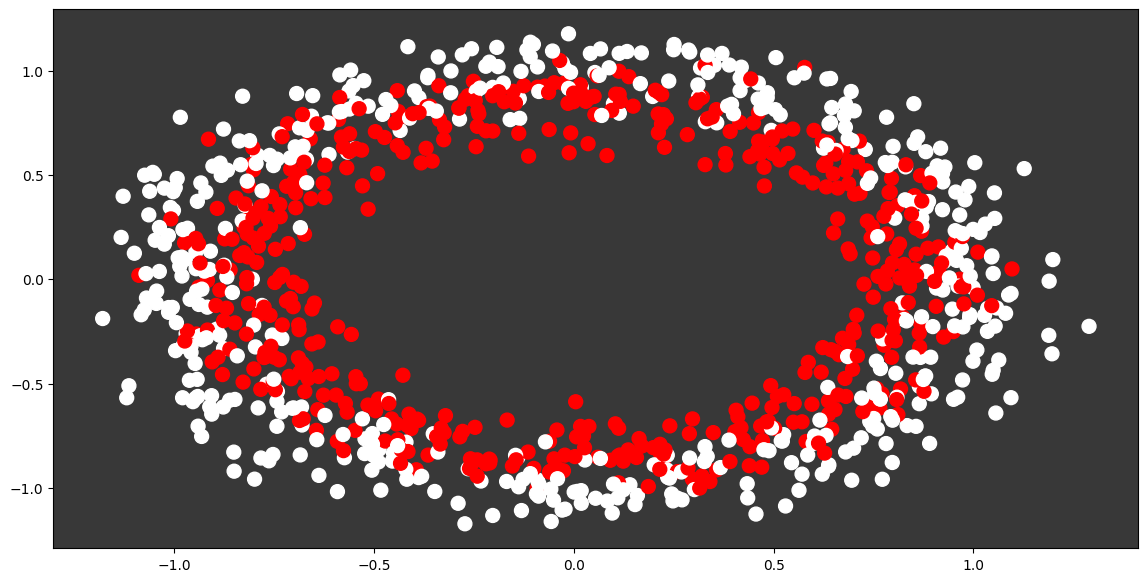

In [ ]:
plt.scatter(X[:,0],X[:,1],
            c=y, s=100,
            cmap = zero_one_colourmap)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.33,
                                                    random_state = 42)

In [ ]:
def get_model(inp_activation):
  model = Sequential()
  model.add(Dense(10, input_dim=2, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(1, activation = "sigmoid"))
  model.compile(loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])
  return model

In [ ]:
def change_in_weight_gradient(old_weight, new_weight, learning_rate):
  gradient = (old_weight - new_weight)/learning_rate
  pct_change_weight = abs(100*(old_weight-new_weight)/old_weight)
  return gradient, pct_change_weight

### Sigmoid Model

In [ ]:
sigmoid_model = get_model("sigmoid")

In [ ]:
sigmoid_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 10)                30        
                                                                 
 dense_25 (Dense)            (None, 10)                110       
                                                                 
 dense_26 (Dense)            (None, 10)                110       
                                                                 
 dense_27 (Dense)            (None, 10)                110       
                                                                 
 dense_28 (Dense)            (None, 10)                110       
                                                                 
 dense_29 (Dense)            (None, 10)                110       
                                                                 
 dense_30 (Dense)            (None, 10)               

In [ ]:
sigmoid_model_first_layer_weights = sigmoid_model.get_weights()[0][0]

In [ ]:
sigmoid_model_first_layer_weights

array([ 0.62832147, -0.06293315,  0.40145415, -0.20305657,  0.1928252 ,
        0.09908861, -0.1640886 , -0.6122937 ,  0.19285691, -0.45379055],
      dtype=float32)

In [ ]:
sigmoid_history = sigmoid_model.fit(X_train, y_train, epochs = 1,
                                    validation_data = (X_test, y_test))

21/21 [==============================] - 3s 19ms/step - loss: 0.7090 - accuracy: 0.4881 - val_loss: 0.6939 - val_accuracy: 0.5242


In [ ]:
sigmoid_model_first_layer_weights_updated = sigmoid_model.get_weights()[0][0]

In [ ]:
sigmoid_model_first_layer_weights_updated

array([ 0.62832135, -0.06293112,  0.40145344, -0.20305394,  0.1928228 ,
        0.09908943, -0.16408718, -0.6122943 ,  0.19285636, -0.45378995],
      dtype=float32)

In [ ]:
s_gradient, s_weight_change = change_in_weight_gradient(sigmoid_model_first_layer_weights,
                                                        sigmoid_model_first_layer_weights_updated,
                                                        sigmoid_model.optimizer.get_config()["learning_rate"])

In [ ]:
s_gradient

array([ 0.00011921, -0.00202656,  0.00071526, -0.00263751,  0.00239909,
       -0.00081956, -0.00143051,  0.00059605,  0.00055134, -0.00059605],
      dtype=float32)

In [ ]:
s_weight_change

array([0.00001897, 0.00322018, 0.00017817, 0.0012989 , 0.00124418,
       0.0008271 , 0.00087179, 0.00009735, 0.00028588, 0.00013135],
      dtype=float32)

### ReLU Model

In [ ]:
activation_model = get_model("relu")

In [ ]:
activation_model_old_first_layer_weight = activation_model.get_weights()[0][0]
activation_model_old_first_layer_weight

array([-0.18250358, -0.13224262, -0.31015173, -0.2967256 , -0.23258585,
        0.22190231,  0.06830388, -0.26673982, -0.23516625,  0.0120756 ],
      dtype=float32)

In [ ]:
activation_history = activation_model.fit(X_train, y_train, epochs = 1,
                                          validation_data = (X_test, y_test))

21/21 [==============================] - 5s 17ms/step - loss: 0.6932 - accuracy: 0.5075 - val_loss: 0.6938 - val_accuracy: 0.4758


In [ ]:
activation_model_updated_first_layer_weights = activation_model.get_weights()[0][0]

In [ ]:
activation_model_updated_first_layer_weights

array([-0.17721456, -0.13692653, -0.3028761 , -0.2893256 , -0.2243063 ,
        0.2211789 ,  0.07164914, -0.26549405, -0.24337882,  0.01982502],
      dtype=float32)

In [ ]:
relu_gradient, relu_weight_change = change_in_weight_gradient(activation_model_old_first_layer_weight,
                                                              activation_model_updated_first_layer_weights,
                                                              activation_model.optimizer.get_config()["learning_rate"])

In [ ]:
relu_gradient

array([-5.2890177,  4.683912 , -7.275611 , -7.400006 , -8.279547 ,
        0.7234066, -3.3452585, -1.2457669,  8.212566 , -7.749421 ],
      dtype=float32)

In [ ]:
relu_weight_change

array([ 2.8980353 ,  3.5419078 ,  2.3458233 ,  2.4938886 ,  3.559781  ,
        0.32600233,  4.897611  ,  0.46703446,  3.4922385 , 64.1742    ],
      dtype=float32)

### **Q3. Check out this Youtube and write a line-by-line explanation of the code above.**

우선 처음에 0 또는 1의 라벨을 가지는 점들을 그렸다. 이 데이터에 대해서 우선 67% 만큼을 훈련셋으로 설정하고, 나머지를 검증셋으로 설정한다. 여기서 X는 점을 의미하고 y는 그 점에서의 라벨 값을 의미합니다.

그리고 우리는 모델 생성을 위해서 기본 모델 구조를 만드는 get_model 메소드를 정의합니다.

이 메소드를 이용해서 활성함수가 sigmoid인 모델을 생성합니다. 이 sigmoid함수 모델은 vanishing gradient problem이 일어납니다.

그리고 이를 보완하기 위헤서 ReLU 활성함수를 사용한 모델인 activation_model을 정의합니다. ReLU함수를 사용함으로서 vanishing gradient problem을 개선하여 직접 볼 수 있듯이 gradient가 비교적 큰 값을 가지고 이 것을 통해서 업데이트도 더 잘 일어나는 것을 확인할 수 있습니다.

# 4. Regression

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics

In [ ]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+",
                     skiprows=22, header=None)

In [ ]:
X = np.hstack([raw_df.values[::2,:],
               raw_df.values[1::2,:2]])
y = raw_df.values[1::2,2]

In [ ]:
X

array([[  0.00632,  18.     ,   2.31   , ...,  15.3    , 396.9    ,
          4.98   ],
       [  0.02731,   0.     ,   7.07   , ...,  17.8    , 396.9    ,
          9.14   ],
       [  0.02729,   0.     ,   7.07   , ...,  17.8    , 392.83   ,
          4.03   ],
       ...,
       [  0.06076,   0.     ,  11.93   , ...,  21.     , 396.9    ,
          5.64   ],
       [  0.10959,   0.     ,  11.93   , ...,  21.     , 393.45   ,
          6.48   ],
       [  0.04741,   0.     ,  11.93   , ...,  21.     , 396.9    ,
          7.88   ]])

In [ ]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

### **Quick Question**

hstack, vstack, concatenate 모두 numpy 라이브러리에서 행렬을 수직 수평 방향으로 결합하는 코드입니다.

hstack은 두 행렬의 열의 개수가 같다면 열방향으로 행렬을 결합해줍니다.

vstack은 두 행렬의 행의 개수가 같다면 행방향으로 행렬을 결합해줍니다.

concatenate는 두 행렬을 결합하는 코드인 것은 같으나 임의로 결합 방향을 설정해줄 수 있습니다.(axis = 0 이면 수직방향, 1이면 수평방향으로 결합)

In [ ]:
import numpy as np

arr1 = np.array([[1, 2, 3]])
arr2 = np.array([[4, 5, 6]])

result = np.concatenate((arr1, arr2), axis=1)
print(result)
print(arr1.shape)
print(arr2.shape)
result.shape

[[1 2 3 4 5 6]]
(1, 3)
(1, 3)


(1, 6)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 1)

### **Quick Question**

함수 train_test_split 은 학습과 테스트 과정에서 사용할 데이터를 나누어주는 역할을 합니다.

위에서 X는 데이터의 input 값을 나타내어 네트워크에 입력되는 값을 말합니다.

또한 y는 대응하는 데이터의 input값에 대한 label값입니다. 즉 네트워크의 output값에 대한 정답을 의미합니다.

test_size는 이 전체 데이터에서 테스트 데이터의 비중을 설정하는 파라미터입니다. 예를 들어 0.4라면 전체 데이터들 중에서 40%를 테스트 데이터로 사용한다는 뜻입니다.

random_state 이 데이터를 랜덤하게 학습데이터와 테스트데이터로 나누지만 시드를 설정하여 이 함수를 여러번 사용했을때 항상 다르게 나누어지느냐 그럼에도 같게 나누어지느냐를 설정하게 됩니다. 예를 들어 random_state = 1로 두면 여러번 함수를 호출해도 항상 값은 데이터셋을 뱉기 때문에 다양한 모델에 대한 학습 성능을 비교할때 주로 이 값을 1로 두고 데이터셋을 나누게 됩니다.

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('Coefficients: ', reg.coef_)

print('Variance score: {}'.format(reg.score(X_train,y_train)))

Coefficients:  [ -0.0895714    0.06731329   0.05046492   2.18579583 -17.20539752
   3.63606995   0.0020558   -1.36602886   0.28957672  -0.01227001
  -0.83488185   0.00940361  -0.50400832]
Variance score: 0.7468316520140627


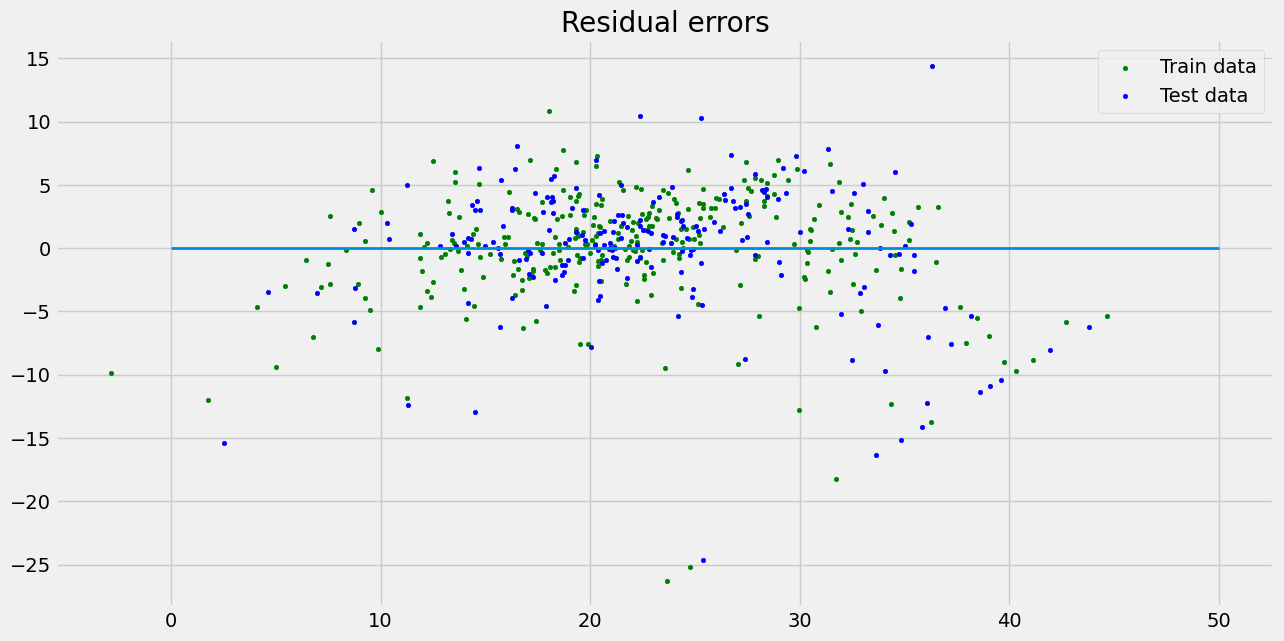

In [ ]:
plt.style.use('fivethirtyeight')

plt.scatter(reg.predict(X_train),
            reg.predict(X_train) - y_train,
            color = "green", s = 10,
            label = 'Train data')

plt.scatter(reg.predict(X_test),
            reg.predict(X_test)-y_test,
            color = "blue", s = 10,
            label = 'Test data')

plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)

plt.legend(loc='upper right')

plt.title("Residual errors")

plt.show()

# 5. Activation Function

In [ ]:
import torch
import torch.nn as nn

class DenseBlock(nn.Module):
  def __init__(self, in_dim, out_dim):
    super(DenseBlock, self).__init__()
    self.dense = nn.Linear(in_dim, out_dim)
    self.act = nn.Sigmoid()

  def forward(self, x):
    out = self.act(self.dense(x))
    return out

In [ ]:
import torch
import torch.nn as nn

class DenseBlock(nn.Module):
  def __init__(self, in_dim, out_dim):
    super(DenseBlock, self).__init__()
    self.dense = nn.Linear(in_dim, out_dim)
    self.act = nn.Tanh()

  def forward(self, x):
    out = self.act(self.dense(x))
    return out

In [ ]:
import torch
import torch.nn as nn

class DenseBlock(nn.Module):
  def __init__(self,in_dim, out_dim):
    super(DenseBlock, self).__init__()
    self.dense = nn.Linear(in_dim,out_dim)
    self.act = nn.LeakyReLU()

  def forward(self,x):
    out = self.act(self.dense(x))
    return out

### **Q4. Write the code for Maxout, ELU, AND GELU in the same format.**

In [ ]:
import torch
import torch.nn as nn

class DenseBlock(nn.Module):
  def __init__(self,in_dim, out_dim):
    super(DenseBlock, self).__init__()
    self.dense = nn.Linear(in_dim, out_dim)
    self.act = nn.Maxout()

  def forward(self,x):
    out = self.act(self.danse(x))
    return out

In [ ]:
import torch
import torch.nn as nn

class DenseBlock(nn.Module):
  def __init__(self,in_dim, out_dim):
    super(DenseBlock, self).__init__()
    self.dense = nn.Linear(in_dim, out_dim)
    self.act = nn.ELU()

  def forward(self,x):
    out = self.act(self.danse(x))
    return out

In [ ]:
import torch
import torch.nn as nn

class DenseBlock(nn.Module):
  def __init__(self,in_dim, out_dim):
    super(DenseBlock, self).__init__()
    self.dense = nn.Linear(in_dim, out_dim)
    self.act = nn.GELU()

  def forward(self,x):
    out = self.act(self.danse(x))
    return out

In [ ]:
class Person:
  def __init__(self, age, height):
    self.age = age
    self.height = height

class Korean(Person):
  def __init__(self, age, height, lang):
    super(Korean, self).__init__(age, height)
    self.lang = lang

class Child(Korean):
  def __init__(self, age, height, lang, birth):
    super(Child, self).__init__(age, height, lang)
    self.birth = birth

P1 = Person(28, 181)
K1 = Korean(28, 181, 'Korean')
C1 = Child(28, 181, 'Korean', 970908)

print(P1.height)
print(K1.height)
print(K1.lang)
print(C1.height)
print(C1.lang)
print(C1.birth)

181
181
Korean
181
Korean
970908
